In [1]:
# Libraries and imports

import os
import yfinance as yf
import pandas as pd
import numpy as np
from itertools import product
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime

import config as cfg

In [2]:
# Constants

watch_days_range = [2]
hold_days_range = [1]
num_stocks_to_buy_range = [1]
loss_limit_range = [0.999]
fee_range = [0.002]
ranks = ['nsmallest']
pct_change_threshold_range = [float('-inf')]
start_watch_times = ["Close"]
buy_times = ["Open"]
sell_times = ["Open"]

overall_start_date = '2000-08-01'
overall_end_date = '2023-12-23'

dates_range = [('2023-01-02', '2023-06-23')]
# dates_range = [('2000-08-01', '2022-12-31'), ('2000-08-02', '2022-12-31'), ('2000-08-03', '2022-12-31'), ('2000-08-04', '2022-12-31'), ('2000-08-05', '2022-12-31'), ('2000-08-06', '2022-12-31'), ('2000-08-07', '2022-12-31'), ('2000-08-08', '2022-12-31'), ('2000-08-09', '2022-12-31'), ('2000-08-10', '2022-12-31'),
#                ('2001-01-01', '2001-12-31'), ('2001-01-02', '2001-12-31'), ('2001-01-03', '2001-12-31'), ('2001-01-04', '2001-12-31'), ('2001-01-05', '2001-12-31'),
#                ('2002-01-01', '2002-12-31'), ('2002-01-02', '2002-12-31'), ('2002-01-03', '2002-12-31'), ('2002-01-04', '2002-12-31'), ('2002-01-07', '2002-12-31'),
#                ('2003-01-01', '2003-12-31'), ('2003-01-02', '2003-12-31'), ('2003-01-03', '2003-12-31'), ('2003-01-06', '2003-12-31'), ('2003-01-07', '2003-12-31'),
#                ('2004-01-01', '2004-12-31'), ('2004-01-02', '2004-12-31'), ('2004-01-05', '2004-12-31'), ('2004-01-06', '2004-12-31'), ('2004-01-07', '2004-12-31'),
#                ('2005-01-03', '2005-12-31'), ('2005-01-04', '2005-12-31'), ('2005-01-05', '2005-12-31'), ('2005-01-06', '2005-12-31'), ('2005-01-07', '2005-12-31'),
#                ('2006-01-02', '2006-12-31'), ('2006-01-03', '2006-12-31'), ('2006-01-04', '2006-12-31'), ('2006-01-05', '2006-12-31'), ('2006-01-06', '2006-12-31'),
#                ('2007-01-01', '2007-12-31'), ('2007-01-02', '2007-12-31'), ('2007-01-03', '2007-12-31'), ('2007-01-04', '2007-12-31'), ('2007-01-05', '2007-12-31'),
#                ('2008-01-01', '2008-12-31'), ('2008-01-02', '2008-12-31'), ('2008-01-03', '2008-12-31'), ('2008-01-04', '2008-12-31'), ('2008-01-07', '2008-12-31'),
#                ('2009-01-01', '2009-12-31'), ('2009-01-02', '2009-12-31'), ('2009-01-05', '2009-12-31'), ('2009-01-06', '2009-12-31'), ('2009-01-07', '2009-12-31'),
#                ('2010-01-01', '2010-12-31'), ('2010-01-04', '2010-12-31'), ('2010-01-05', '2010-12-31'), ('2010-01-06', '2010-12-31'), ('2010-01-07', '2010-12-31'),
#                ('2011-01-03', '2011-12-31'), ('2011-01-04', '2011-12-31'), ('2011-01-05', '2011-12-31'), ('2011-01-06', '2011-12-31'), ('2011-01-07', '2011-12-31'),
#                ('2012-01-02', '2012-12-31'), ('2012-01-03', '2012-12-31'), ('2012-01-04', '2012-12-31'), ('2012-01-05', '2012-12-31'), ('2012-01-06', '2012-12-31'),
#                ('2013-01-01', '2013-12-31'), ('2013-01-02', '2013-12-31'), ('2013-01-03', '2013-12-31'), ('2013-01-04', '2013-12-31'), ('2013-01-07', '2013-12-31'),
#                ('2014-01-01', '2014-12-31'), ('2014-01-02', '2014-12-31'), ('2014-01-03', '2014-12-31'), ('2014-01-06', '2014-12-31'), ('2014-01-07', '2014-12-31'),
#                ('2015-01-01', '2015-12-31'), ('2015-01-05', '2015-12-31'), ('2015-01-06', '2015-12-31'), ('2015-01-07', '2015-12-31'), ('2015-01-08', '2015-12-31'),
#                ('2016-01-01', '2016-12-31'), ('2016-01-04', '2016-12-31'), ('2016-01-05', '2016-12-31'), ('2016-01-06', '2016-12-31'), ('2016-01-07', '2016-12-31'),
#                ('2017-01-02', '2017-12-31'), ('2017-01-03', '2017-12-31'), ('2017-01-04', '2017-12-31'), ('2017-01-05', '2017-12-31'), ('2017-01-06', '2017-12-31'),
#                ('2018-01-01', '2018-12-31'), ('2018-01-02', '2018-12-31'), ('2018-01-03', '2018-12-31'), ('2018-01-04', '2018-12-31'), ('2018-01-05', '2018-12-31'),
#                ('2019-01-01', '2019-12-31'), ('2019-01-02', '2019-12-31'), ('2019-01-03', '2019-12-31'), ('2019-01-04', '2019-12-31'), ('2019-01-07', '2019-12-31'),
#                ('2020-01-01', '2020-12-31'), ('2020-01-02', '2020-12-31'), ('2020-01-03', '2020-12-31'), ('2020-01-06', '2020-12-31'), ('2020-01-07', '2020-12-31'),
#                ('2021-01-01', '2021-12-31'), ('2021-01-04', '2021-12-31'), ('2021-01-05', '2021-12-31'), ('2021-01-06', '2021-12-31'), ('2021-01-07', '2021-12-31'),
#                ('2022-01-03', '2022-12-31'), ('2022-01-04', '2022-12-31'), ('2022-01-05', '2022-12-31'), ('2022-01-06', '2022-12-31'), ('2022-01-07', '2022-12-31'),
#                ('2023-01-02', '2023-06-23'), ('2023-01-03', '2023-06-23'), ('2023-01-04', '2023-06-23'), ('2023-01-05', '2023-12-23'), ('2023-01-06', '2023-12-23')]

tickers = cfg.selected_tickers
num_tickers = len(tickers)

num_combinations = len(dates_range) * len(ranks) * len(start_watch_times) * len(buy_times) * len(sell_times) * len(pct_change_threshold_range) * len(watch_days_range) * len(hold_days_range) * len(num_stocks_to_buy_range) * len(loss_limit_range) * len(fee_range)
combinations_per_minute = 10

print(f"Number of combinations: {num_combinations}, Estimated time: {(num_combinations / combinations_per_minute):.2f} minutes")

Number of combinations: 1, Estimated time: 0.10 minutes


In [3]:
# Download stock data

folder_path = './db/'
file_name = f'ohlcv_ntickers_{num_tickers}_{overall_start_date}_to_{overall_end_date}.pkl'
file_path = folder_path + file_name

def download_stock_data(tickers, start_date, end_date):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    if os.path.isfile(file_path):
        df = pd.read_pickle(file_path)
    else:
        stock_data = yf.download(tickers, start=start_date, end=end_date)
        df = pd.DataFrame(stock_data)
        df = df.sort_values("Date") # stock_data is not ordered by default
        df.to_pickle(file_path)

    return df

stock_data_df = download_stock_data(tickers, overall_start_date, overall_end_date)

In [4]:
# Pre-process stock data

def filter_stock_data(df, start_date, end_date):
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    filtered_df = df.loc[(df.index >= start_date) & (df.index <= end_date)]
    
    return filtered_df

def extract_stock_data(df, start_watch_time, buy_time, sell_time):
    def get_column_df(df, column):
        column_df = df[[column]]
        column_df.columns = column_df.columns.droplevel(0) # Convert to single level columns
        return column_df
    
    start_watch_df = get_column_df(df, start_watch_time)
    buy_df = get_column_df(df, buy_time)
    sell_df = get_column_df(df, sell_time)
    low_df = get_column_df(df, "Low")

    return start_watch_df, buy_df, sell_df, low_df

In [5]:
# Helper functions

def get_number_of_years(start_date, end_date):
    start = datetime.strptime(start_date, "%Y-%m-%d")
    end = datetime.strptime(end_date, "%Y-%m-%d")
    delta = end - start
    return delta.days / 365.25

def add_year_column(df):
    df['year'] = df['date_range'].str[:4]
    column = df.pop("year") # Remove the "year" column from its current position
    df.insert(1, "year", column) # Insert the "year" column at the desired position (index 1)
    
    return df

def plot_profits(profits_list, total_profits_list):
    mpl.rcParams['figure.figsize'] = [20, 15]
    mpl.rcParams['axes.grid'] = True

    plt.plot(profits_list)
    plt.title('profit vs iteration')
    plt.show()

    plt.plot(total_profits_list)
    plt.title('total profit vs iteration')
    plt.show()

In [6]:
# Analysis functions

def get_price_increases(start_watch_df, buy_df, start_watch_day_number, buy_day_number):
    start_watch_prices = start_watch_df.iloc[[start_watch_day_number]]
    buy_prices = buy_df.iloc[[buy_day_number]]

    prices = pd.concat([start_watch_prices, buy_prices])
    price_increases = prices.pct_change().tail(1)
    
    return price_increases

def get_top_stocks(rank, pct_change_threshold, price_increases, num_stocks_to_buy):
    if rank == 'nlargest':    
        filtered_columns = price_increases.columns[(price_increases > pct_change_threshold).any()].tolist()
        top_stocks = sorted(filtered_columns, key=lambda col: price_increases[col].values[0], reverse=True)[:num_stocks_to_buy]
        return top_stocks

    elif rank == 'nsmallest':
        filtered_columns = price_increases.columns[(price_increases > pct_change_threshold).any()].tolist()
        top_stocks = sorted(filtered_columns, key=lambda col: price_increases[col].values[0], reverse=False)[:num_stocks_to_buy]
        return top_stocks
    
    return None

def calculate_profit(buy_df, sell_df, low_df, buy_day_number, sell_day_number, top_stocks, loss_limit, fee):
    buy_prices = buy_df.loc[buy_df.index[buy_day_number], top_stocks] # Calculate the buying prices at the start of the hold period
    buy_prices = buy_prices.sort_index(axis=0)

    hold_prices = sell_df.loc[sell_df.index[sell_day_number], top_stocks] # Calculate the selling prices after watch_days + hold_days days
    hold_prices = hold_prices.sort_index(axis=0)

    limit_prices = loss_limit * buy_prices

    min_prices = low_df.iloc[buy_day_number+1:sell_day_number+1].min() # Calculate the minimum price in the holding period
    min_prices = min_prices.loc[min_prices.index.intersection(top_stocks)]
    min_prices = min_prices.sort_index(axis=0)
    
    condition = min_prices < limit_prices

    sell_prices = hold_prices.copy()
    sell_prices[condition] = limit_prices[condition]

    profits = (sell_prices * (1 - fee)) / (buy_prices * (1 + fee))
    profits = profits.dropna()

    mean_profit = profits.mean(skipna=True) # Calculate the average of profits of the selected stocks

    if num_combinations == 1:
        print(f"profits: {profits} \n buy_prices: {buy_prices} \n sell_prices: {sell_prices} \n")

    return mean_profit

def get_win_ratio(profits):
    count = sum(1 for num in profits if num > 1)
    win_ratio = count / len(profits)
    
    return round(win_ratio, 2)

In [7]:
# Transform functions

def get_results(stock_data_df):
    results = []
    combination_index = 0

    for start_date, end_date in dates_range:
        filtered_stock_data_df = filter_stock_data(stock_data_df, start_date, end_date)
        years = get_number_of_years(start_date, end_date)
        
        for start_watch_time, buy_time, sell_time in product(start_watch_times, buy_times, sell_times):
            start_watch_df, buy_df, sell_df, low_df = extract_stock_data(filtered_stock_data_df, start_watch_time, buy_time, sell_time)
            
            for rank, pct_change_threshold, watch_days, hold_days, num_stocks_to_buy, loss_limit, fee in product(
                ranks, pct_change_threshold_range, watch_days_range, hold_days_range, num_stocks_to_buy_range, loss_limit_range, fee_range
            ):
                num_iterations = int(len(buy_df) / (watch_days + hold_days)) - 1
                total_profit = 1
                profits_list = []
                total_profits_list = []

                for i in range(num_iterations):
                    start_watch_day_number = i * (watch_days + hold_days)
                    buy_day_number = start_watch_day_number + watch_days
                    sell_day_number = buy_day_number + hold_days

                    price_increases = get_price_increases(start_watch_df, buy_df, start_watch_day_number, buy_day_number)

                    if len(price_increases.columns) >= num_stocks_to_buy:
                        top_stocks = get_top_stocks(rank, pct_change_threshold, price_increases, num_stocks_to_buy)
                        profit = calculate_profit(buy_df, sell_df, low_df, buy_day_number, sell_day_number, top_stocks, loss_limit, fee) if top_stocks is not None else 1
                        total_profit *= profit if np.isfinite(profit) else 1
                        yearly_profit = pow(total_profit, 1 / years)

                        profits_list.append(profit)
                        total_profits_list.append(total_profit)

                win_ratio = get_win_ratio(profits_list)

                results.append({
                    'date_range': f'{start_date}/{end_date}',
                    'start_watch_time': start_watch_time,
                    'buy_time': buy_time,
                    'sell_time': sell_time,
                    'rank': rank,
                    'pct_change_threshold': pct_change_threshold,
                    'watch_days': watch_days,
                    'hold_days': hold_days,
                    'num_stocks_to_buy': num_stocks_to_buy,
                    'loss_limit': loss_limit,
                    'fee': fee,
                    'num_tickers': num_tickers,
                    'total_profit': round(total_profit, 4),
                    'yearly_profit': round(yearly_profit, 4),
                    'win_ratio': win_ratio
                })

                print(f"Combination: {combination_index + 1} / {num_combinations}", end="\r")
                combination_index += 1
    
    if num_combinations == 1:
        plot_profits(profits_list, total_profits_list)

    results_df = pd.DataFrame(results)
    results_df = add_year_column(results_df)
    results_df.sort_values("yearly_profit", ascending=False, inplace=True)

    return results_df

def get_overall_cross_tab(df):
    def get_cross_tab(df, values_column, agg_funcs, sorting_func):
        cross_tab = pd.crosstab(
            index=[df['start_watch_time'], df['buy_time'], df['sell_time'], df['rank'], df['pct_change_threshold'], df['watch_days'], df['hold_days'], df['num_stocks_to_buy'], df['loss_limit'], df['fee'], df['num_tickers']],
            columns=df['year'],
            values=df[values_column],
            aggfunc=agg_funcs,
            margins=True)
        cross_tab = cross_tab.sort_values(by=[(sorting_func, 'All')], ascending=False)

        return cross_tab

    cross_tab_profit = get_cross_tab(df, 'yearly_profit', ['median', 'mean', 'min', 'max', 'count'], 'median')
    cross_tab_win_ratio = get_cross_tab(df, 'win_ratio', ['mean'], 'mean')
    
    cross_tab_profit.columns = pd.MultiIndex.from_tuples([('yearly_profit', col) for col in cross_tab_profit.columns])
    cross_tab_win_ratio.columns = pd.MultiIndex.from_tuples([('win_ratio', col) for col in cross_tab_win_ratio.columns])

    overall_cross_tab = pd.concat([cross_tab_profit, cross_tab_win_ratio], axis=1)
    
    print(overall_cross_tab.to_markdown())

    return overall_cross_tab

profits: ALDR.PA    0.995012
dtype: float64 
 buy_prices: ALDR.PA    40.0
Name: 2023-01-04 00:00:00, dtype: float64 
 sell_prices: ALDR.PA    39.96
Name: 2023-01-05 00:00:00, dtype: float64 

profits: BFISH.OL    0.995012
dtype: float64 
 buy_prices: BFISH.OL    2.9
Name: 2023-01-09 00:00:00, dtype: float64 
 sell_prices: BFISH.OL    2.8971
Name: 2023-01-10 00:00:00, dtype: float64 

profits: ALGRE.PA    0.995012
dtype: float64 
 buy_prices: ALGRE.PA    0.002428
Name: 2023-01-12 00:00:00, dtype: float64 
 sell_prices: ALGRE.PA    0.002426
Name: 2023-01-13 00:00:00, dtype: float64 

profits: MLSUM.PA    0.996008
dtype: float64 
 buy_prices: MLSUM.PA    0.002
Name: 2023-01-17 00:00:00, dtype: float64 
 sell_prices: MLSUM.PA    0.002
Name: 2023-01-18 00:00:00, dtype: float64 

profits: ALKLK.PA    0.995012
dtype: float64 
 buy_prices: ALKLK.PA    1.24
Name: 2023-01-20 00:00:00, dtype: float64 
 sell_prices: ALKLK.PA    1.23876
Name: 2023-01-23 00:00:00, dtype: float64 

profits: ALLAM.PA 

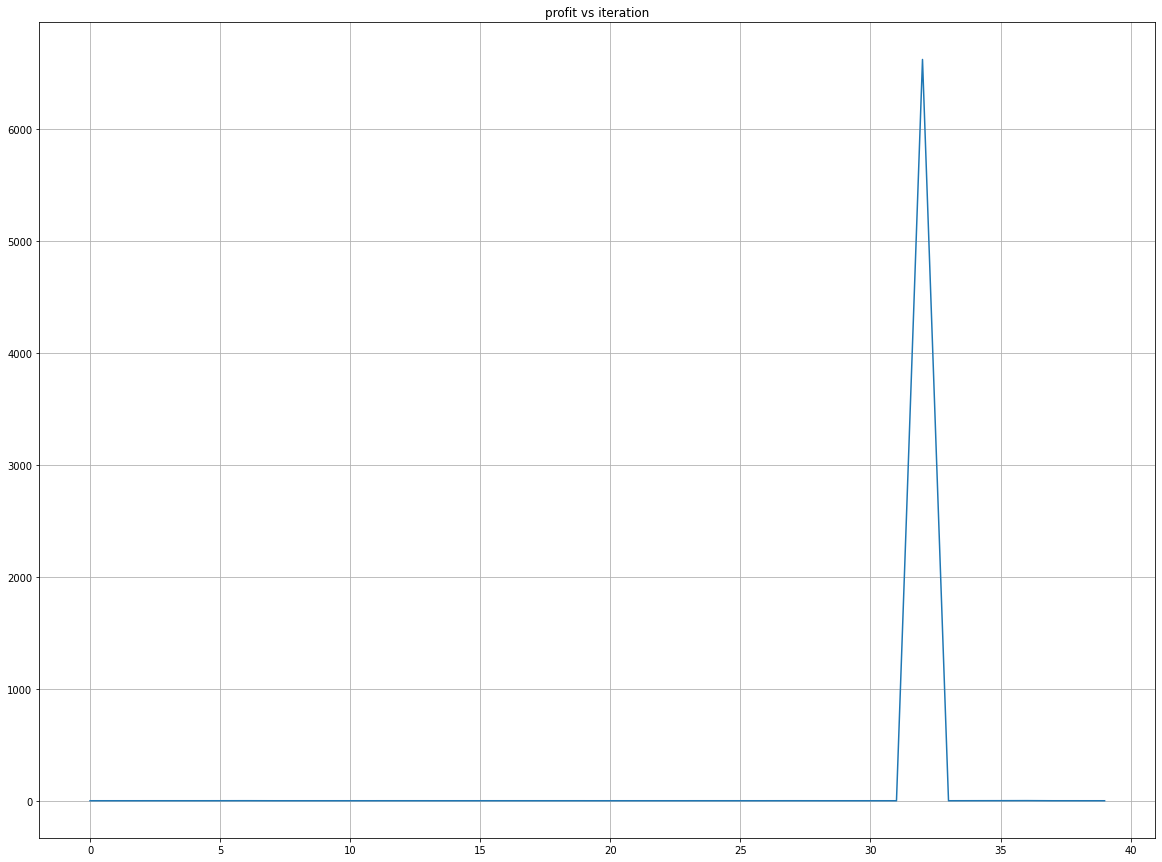

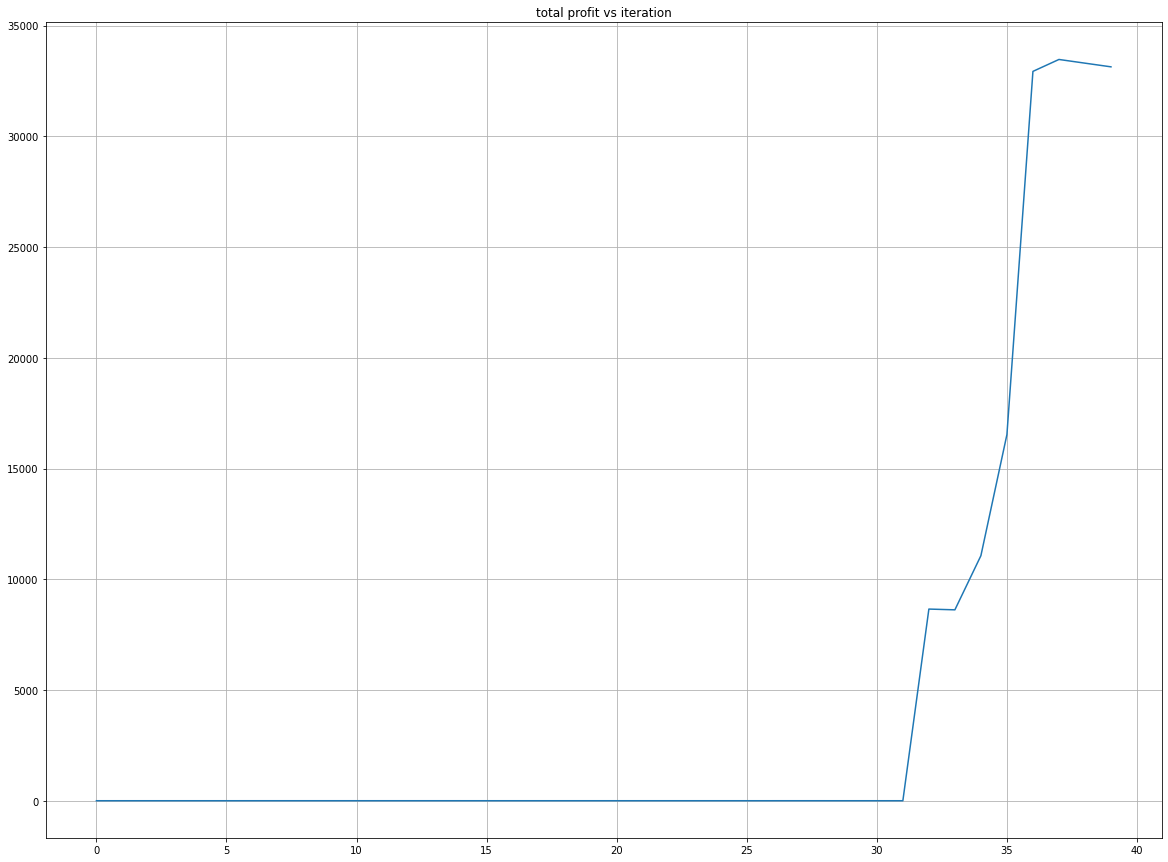

|                                                                           |   ('yearly_profit', ('median', '2023')) |   ('yearly_profit', ('median', 'All')) |   ('yearly_profit', ('mean', '2023')) |   ('yearly_profit', ('mean', 'All')) |   ('yearly_profit', ('min', '2023')) |   ('yearly_profit', ('min', 'All')) |   ('yearly_profit', ('max', '2023')) |   ('yearly_profit', ('max', 'All')) |   ('yearly_profit', ('count', '2023')) |   ('yearly_profit', ('count', 'All')) |   ('win_ratio', ('mean', '2023')) |   ('win_ratio', ('mean', 'All')) |
|:--------------------------------------------------------------------------|----------------------------------------:|---------------------------------------:|--------------------------------------:|-------------------------------------:|-------------------------------------:|------------------------------------:|-------------------------------------:|------------------------------------:|---------------------------------------:|--------------------

In [8]:
# Load functions

formatted_datetime = datetime.now().strftime("%Y-%m-%d_%Hh%Mm%Ss")

results_df = get_results(stock_data_df)
results_df.to_csv(f'./outputs/results_{formatted_datetime}.csv', index=False)

cross_tab = get_overall_cross_tab(results_df)
cross_tab.to_csv(f'./outputs/pivot_table_{formatted_datetime}.csv')